In [1]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import random, sys
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
dataset = pandas.read_csv('st.csv')

print(dataset.shape)

(49, 6)


In [3]:
print(dataset.describe())

       status_2016        dem  initiative  mjballots        num
count    49.000000  49.000000   49.000000  49.000000  49.000000
mean      1.367347   0.530612    0.469388   1.204082   0.432993
std       1.112315   0.504234    0.504234   2.198291   0.311836
min       0.000000   0.000000    0.000000   0.000000   0.001261
25%       0.000000   0.000000    0.000000   0.000000   0.167040
50%       2.000000   1.000000    0.000000   0.000000   0.408202
75%       2.000000   1.000000    1.000000   1.000000   0.639542
max       3.000000   1.000000    1.000000   8.000000   0.984902


In [4]:
array = dataset.values
X = array[:,2:5]
Y = array[:,1]
Y = Y.astype('int')
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [5]:
scoring = 'accuracy'

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [8]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=9, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.650000 (0.273861)
LDA: 0.650000 (0.217307)
KNN: 0.744444 (0.199227)
TREE: 0.694444 (0.225394)
NB: 0.594444 (0.227846)
SVM: 0.744444 (0.199227)


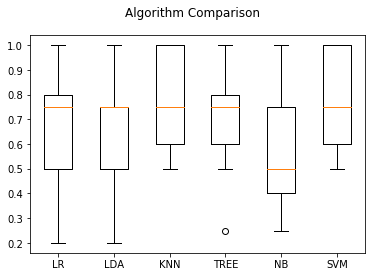

In [9]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
samp = [[1,1,5]]
predictions = knn.predict(samp)
predictions

array([3])